In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0, 5 , 11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Text(0.5,1,'Title y=x^2')

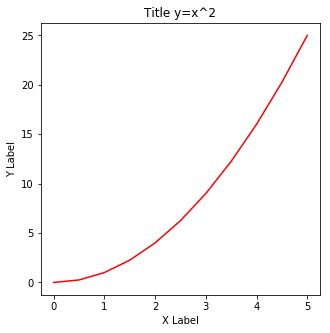

In [14]:
# Function plot
plt.figure(figsize=[5, 5])
plt.plot(x, y, 'r-')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title y=x^2')

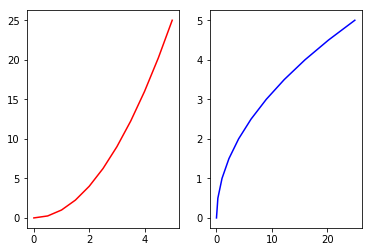

In [15]:
# multiple plots
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'b')

Text(0.5,1,'Title')

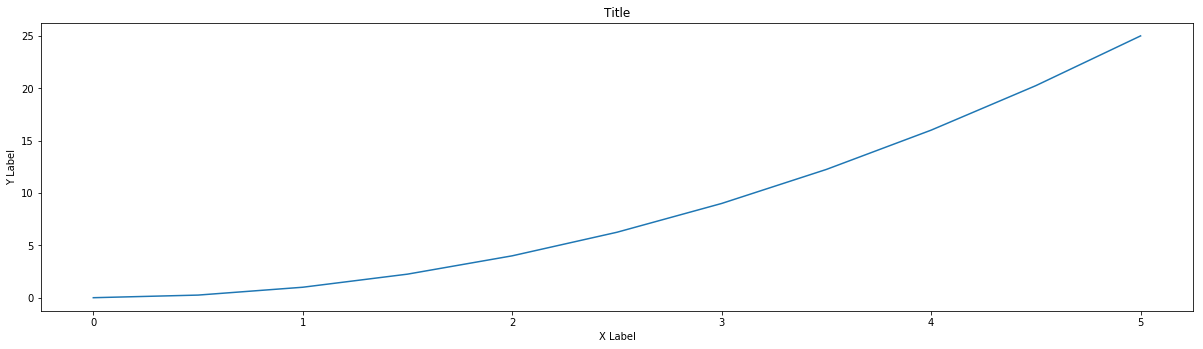

In [22]:
# Object oriented method
fig = plt.figure(figsize=[20, 5])   # imaginary blank canvas
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y)
axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_title('Title')

Text(0.5,1,'Small Plot')

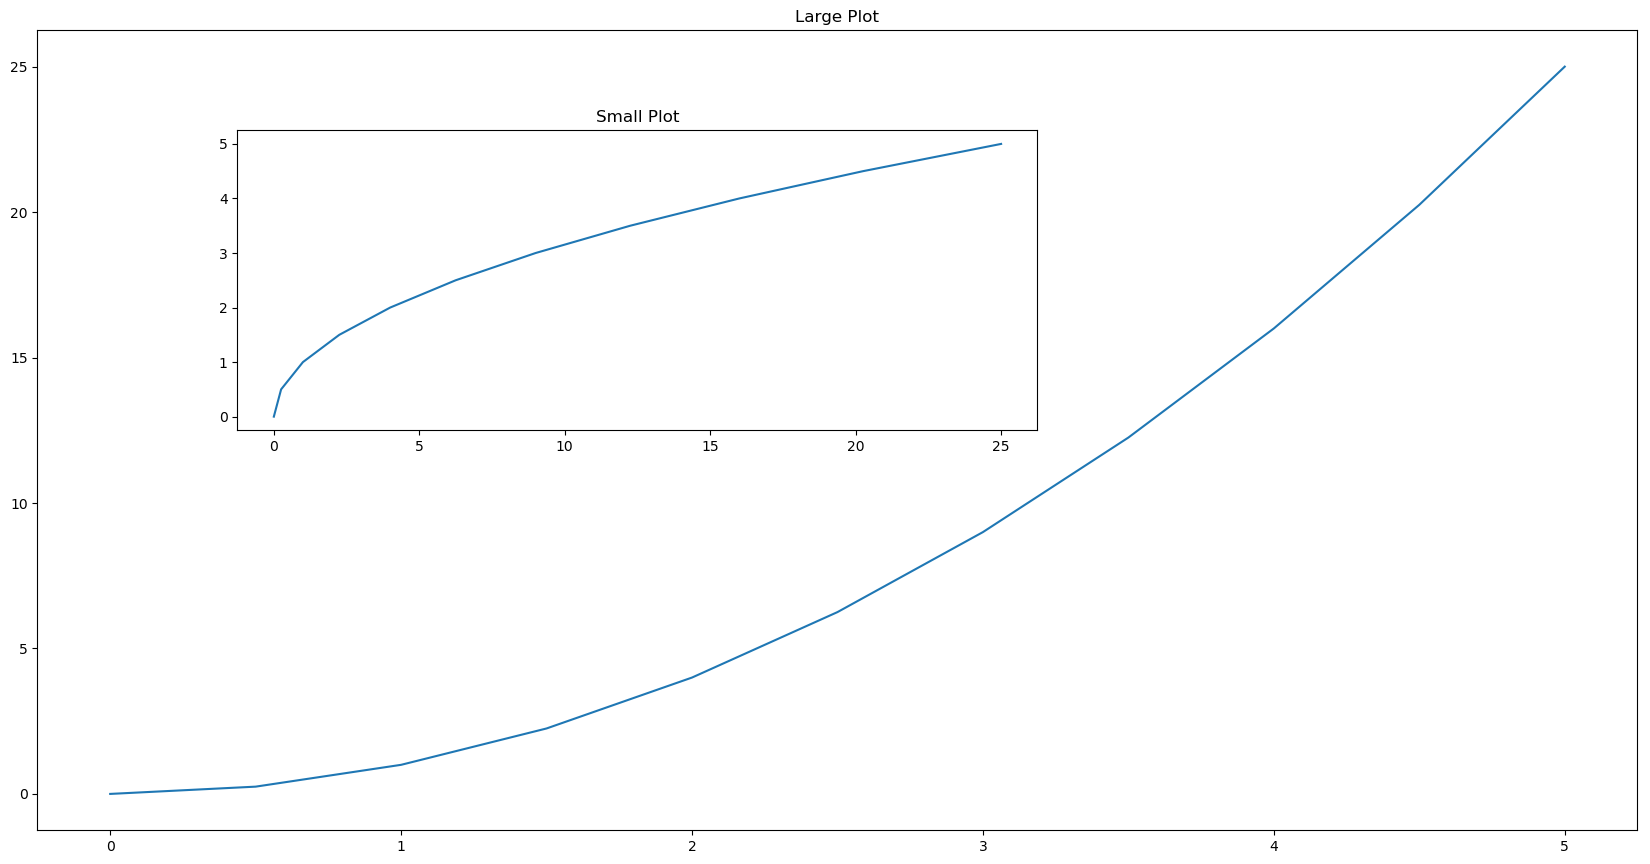

In [41]:
# Object oriented method
fig = plt.figure(figsize=(20, 10), dpi=100)   # imaginary blank canvas
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y)
axes1.set_title('Large Plot')

axes2.plot(y, x)
axes2.set_title('Small Plot')

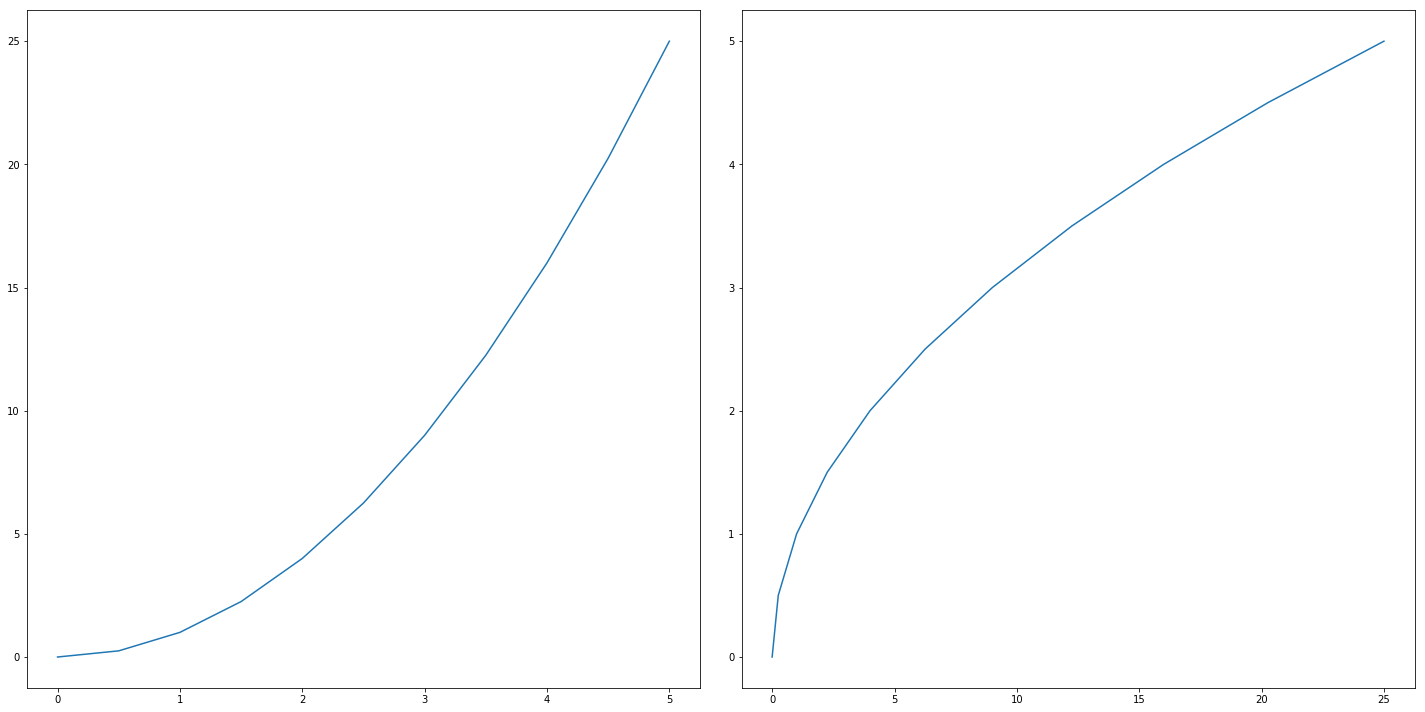

In [44]:
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.tight_layout()
# for ax in axes:
#    ax.plot(x, y)
axes[0].plot(x, y)
axes[1].plot(y, x)

In [50]:
# save a figure to a file
fig.savefig('my_picture.png')

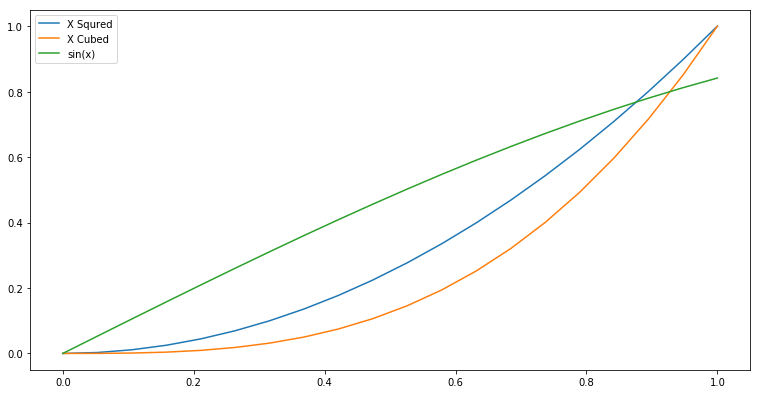

In [57]:
# Legend to annotate the plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
x = np.linspace(0, 1, 20)
ax.plot(x, x**2, label='X Squred')
ax.plot(x, x**3, label='X Cubed')
ax.plot(x, np.sin(x), label='sin(x)')
ax.legend()

(0, 2)

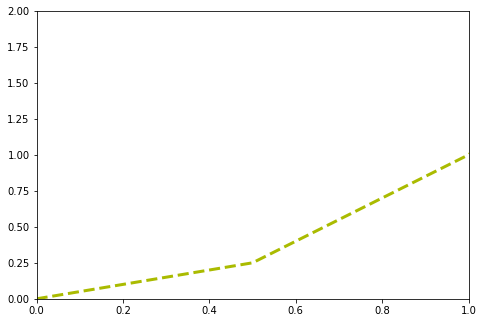

In [70]:
# Plot Appearance
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

x = np.linspace(0, 5 , 11)
y = x ** 2

# linewidth or lw
# alpha: transparancy
# linestyle or ls
# marker: o, +, v; markersize; markerfacecolor; markeredgewidth; markeredgecolor
ax.plot(x, y, color='#AABB00', lw=3, ls='--')

ax.set_xlim([0, 1])
ax.set_ylim([0, 2])

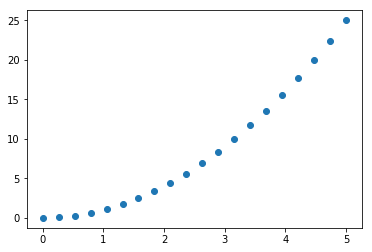

In [72]:
# Special Plot Types
x = np.linspace(0, 5, 20)
y = x ** 2
plt.scatter(x, y)

(array([14.,  8.,  7., 10.,  8.,  8., 11., 10., 10., 14.]),
 array([  3. , 102.3, 201.6, 300.9, 400.2, 499.5, 598.8, 698.1, 797.4,
        896.7, 996. ]),
 <a list of 10 Patch objects>)

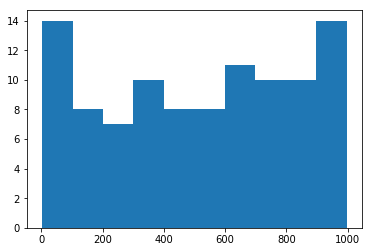

In [73]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x11b1ba470>,
 'caps': [<matplotlib.lines.Line2D at 0x11b1bad68>,
 'boxes': [<matplotlib.patches.PathPatch at 0x11b1ba208>,
 'medians': [<matplotlib.lines.Line2D at 0x11b1c15f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b1c1a20>,
 'means': []}

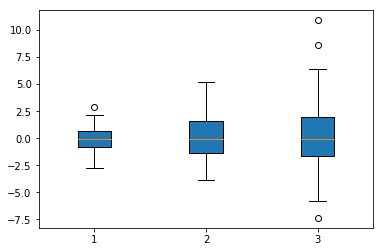

In [77]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data, vert=True, patch_artist=True)

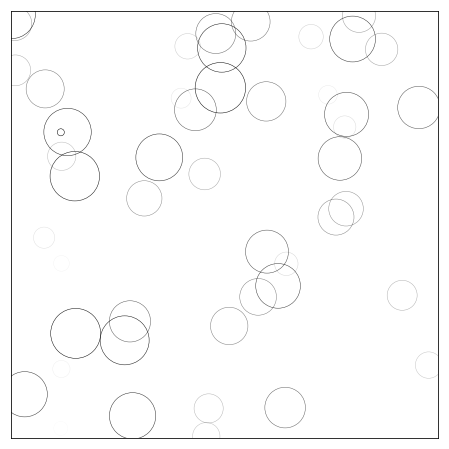

In [81]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation = FuncAnimation(fig, update, interval=10)
# animation.save('../figures/rain.gif', writer='imagemagick', fps=30, dpi=72)
# plt.show()